In [1]:
# Following this tutorial with some of our ASO data: http://pythonhosted.org/laspy/tut_part_1.html
import numpy as np
from laspy.file import File
inFile = File("data/split0156.las", mode = "r")

In [2]:
# some random point in our file
point = inFile[7388]
print(point)
print(point.gps_time)
print(point.return_num)
print(point.num_returns)

point = inFile[7389]
print(point)
print(point.gps_time)
print(point.return_num)
print(point.num_returns)

point = inFile[7390]
print(point)
print(point.gps_time, point.return_num, point.num_returns)




248272.18611836003
1
3
248272.18611836003
2
3
248272.18611836003 3 3


In [3]:
#Find out what the point format looks like.
for spec in inFile.point_format:
    print(spec.name)

X
Y
Z
intensity
flag_byte
raw_classification
scan_angle_rank
user_data
pt_src_id
gps_time


In [4]:
#Lets take a look at the header also.
headerformat = inFile.header.header_format
for spec in headerformat:
    print(spec.name)

file_sig
file_source_id
global_encoding
proj_id_1
proj_id_2
proj_id_3
proj_id_4
version_major
version_minor
system_id
software_id
created_day
created_year
header_size
data_offset
num_variable_len_recs
data_format_id
data_record_length
point_records_count
point_return_count
x_scale
y_scale
z_scale
x_offset
y_offset
z_offset
x_max
x_min
y_max
y_min
z_max
z_min


In [5]:
print('scale: ',inFile.header.scale)
print('offset: ',inFile.header.offset)
print('min: ',inFile.header.min)
print('max: ',inFile.header.max)
print('records count: ',inFile.header.point_records_count)
print('returns count: ',inFile.header.point_return_count)

scale:  [0.001, 0.001, 0.001]
offset:  [459453.0, 5292469.0, -487.0]
min:  [457135.088, 5287809.459, 1116.878]
max:  [457658.272, 5288013.52, 1272.179]
records count:  10000
returns count:  [8608, 1095, 259, 33, 5]


In [7]:
binwidth = 10
bin_list_z = np.arange(round(min(inFile.Z*inFile.header.scale[2]),0), \
                       round(max(inFile.Z*inFile.header.scale[2]),0) + binwidth, binwidth)
bin_list_x = np.arange(round(min(inFile.X*inFile.header.scale[0]),0), \
                       round(max(inFile.X*inFile.header.scale[0]),0) + binwidth, binwidth)
bin_list_y = np.arange(round(min(inFile.Y*inFile.header.scale[1]),0), \
                       round(max(inFile.Y*inFile.header.scale[1]),0) + binwidth, binwidth)

bin_list_intensity = np.arange(round(min(inFile.intensity),0), \
                       round(max(inFile.intensity),0) + binwidth, binwidth)

print(max(bin_list_intensity))
print(max(bin_list_x),max(bin_list_y),max(bin_list_z))

121
-1788.0 -4450.0 1764.0


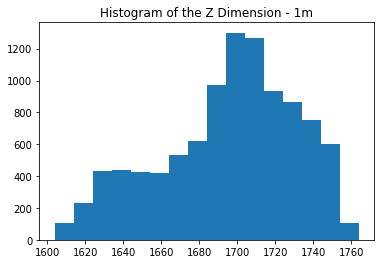

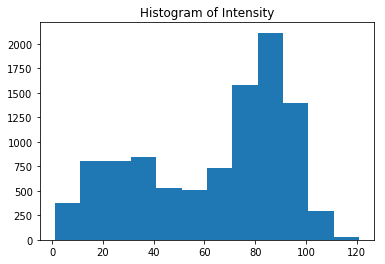

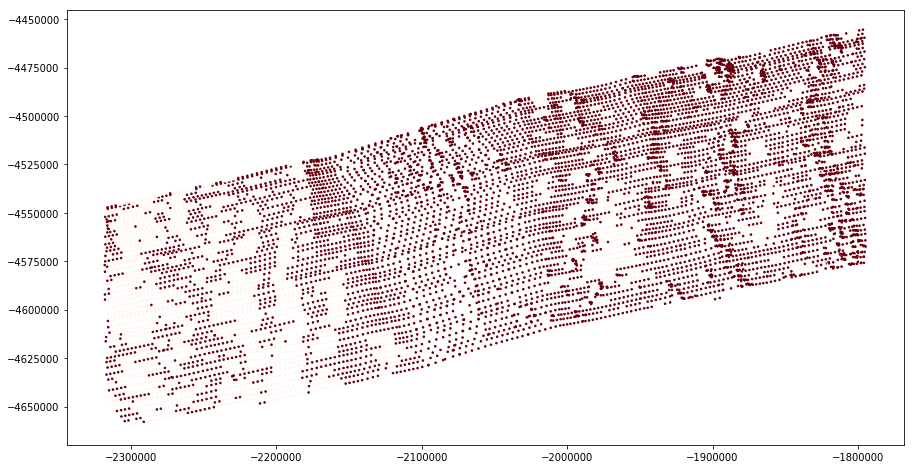

In [48]:
import matplotlib.pyplot as plt
plt.hist(inFile.Z*inFile.header.scale[2],bins=bin_list_z)
plt.title("Histogram of the Z Dimension - 1m")
plt.show()

plt.hist(inFile.intensity,bins=bin_list_intensity)
plt.title("Histogram of Intensity")
plt.show()

plt.figure(figsize=(15,8))
plt.scatter(inFile.X, \
            inFile.Y, \
            c=inFile.raw_classification, \
            marker='.', \
            s=10, \
            cmap='Reds'\
           )
plt.show()

#plt.hist(inFile.Y*inFile.header.scale[1],bins=bin_list_y,)
#plt.title("Histogram of the Y Dimension - 1m")
#plt.show()

inFile.Z length: 10000


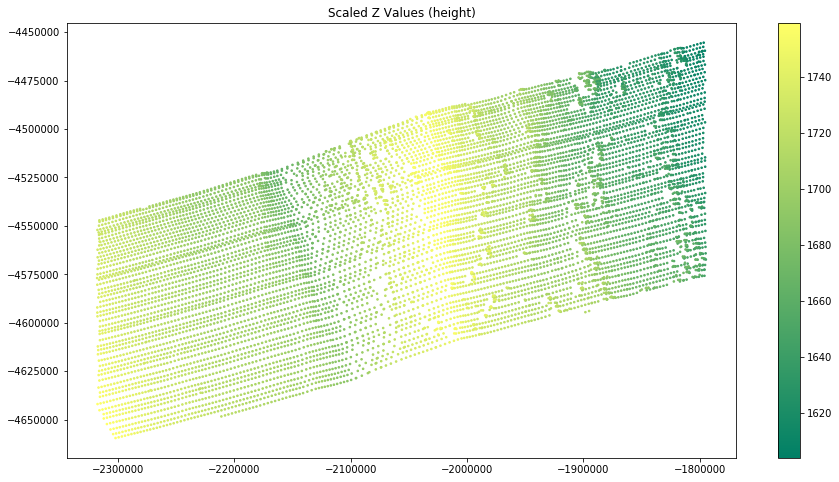

In [10]:
from matplotlib import cm
print('inFile.Z length:',len(inFile.Z))

plt.figure(figsize=(15,8))
plt.scatter(inFile.X, \
            inFile.Y, \
            c=inFile.Z*inFile.header.scale[2], \
            marker='.', \
            s=10, \
            cmap='summer'\
           )
plt.colorbar()
plt.title("Scaled Z Values (height)")
plt.show()



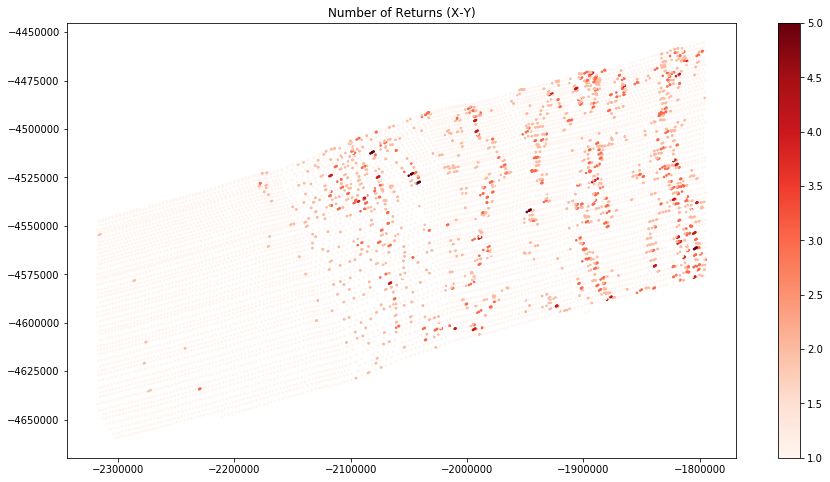

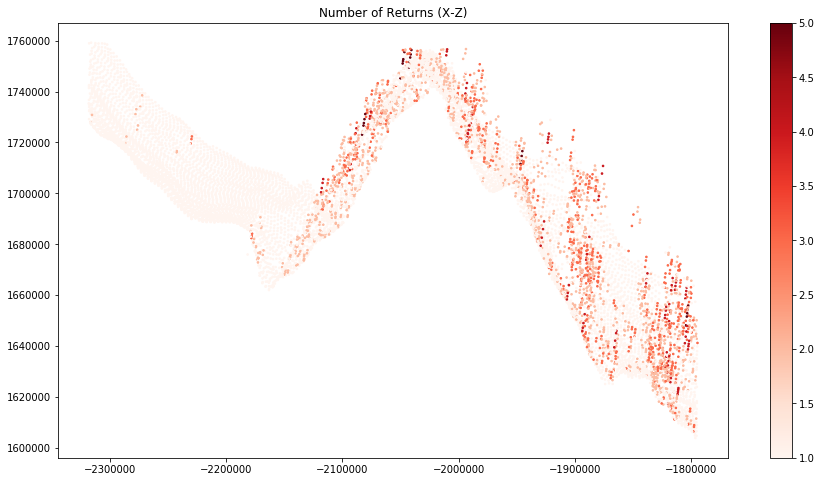

In [11]:
# plot all returns
plt.figure(figsize=(15,8))
plt.scatter(inFile.X, \
            inFile.Y, \
            c=inFile.num_returns, \
            marker='.', \
            s=10, \
            cmap='Reds'\
           )
plt.colorbar()
plt.title("Number of Returns (X-Y)")
plt.show()


plt.figure(figsize=(15,8))
plt.scatter(inFile.X, \
            inFile.Z, \
            c=inFile.num_returns, \
            marker='.', \
            s=10, \
            cmap='Reds'\
           )
plt.colorbar()
plt.title("Number of Returns (X-Z)")
plt.show()

In [12]:
# sellect only the first returns
first_returns = []
# select only first returns
for x in range(len(inFile)):
    point = inFile[x]
    if point.num_returns == 1:
        first_returns.append([inFile[x].X,inFile[x].Y,inFile[x].Z,inFile[x].intensity])



In [13]:
# plot only the first returns
plt.figure(figsize=(12,6))
plt.scatter(first_returns.X, \
            first_returns.Y, \
            c=first_returns.intensity, \
            marker='.', \
            s=10, \
            cmap='Reds'\
           )
plt.colorbar()
plt.title("Number of Returns (X-Y)")
plt.show()


plt.figure(figsize=(12,6))
plt.scatter(first_returns.X, \
            first_returns.Z, \
            c=first_returns.intensity, \
            marker='.', \
            s=10, \
            cmap='Reds'\
           )
plt.colorbar()
plt.title("Number of Returns (X-Z)")
plt.show()

AttributeError: 'list' object has no attribute 'X'

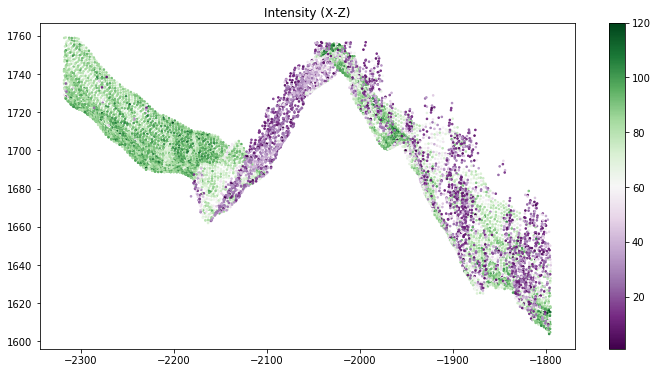

In [14]:

# intensity
plt.figure(figsize=(12,6))
plt.scatter(inFile.X*inFile.header.scale[0], \
            inFile.Z*inFile.header.scale[2], \
            c=inFile.intensity, \
            marker='.', \
            s=10, \
            cmap='PRGn'\
           )
plt.colorbar()
plt.title("Intensity (X-Z)")
plt.show()


In [16]:
# Grab the return_num and num_returns dimensions
num_returns = inFile.num_returns
return_num = inFile.return_num
ground_points = inFile.points[num_returns == return_num]
print(num_returns[30])
print(return_num[30])
print("%i points out of %i were ground points." % (len(ground_points),len(inFile)))


2
1
8625 points out of 10000 were ground points.


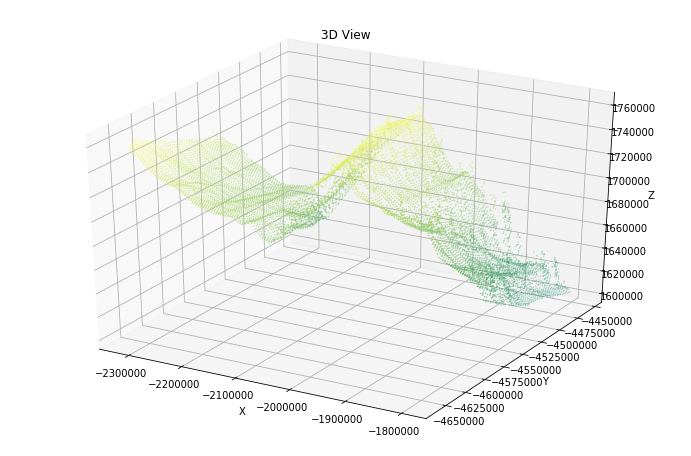

In [17]:
'''
==============
3D scatterplot
==============
Demonstration of a basic scatterplot in 3D.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(inFile.X, inFile.Y, inFile.Z, c=inFile.Z, marker='.', s=.7, cmap='summer')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("3D View")
plt.show()


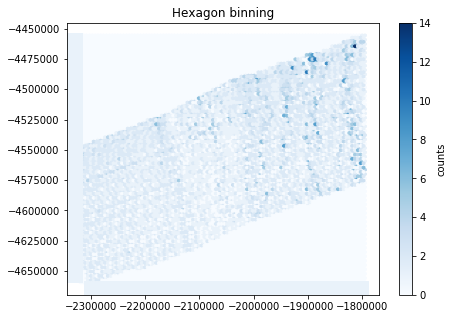

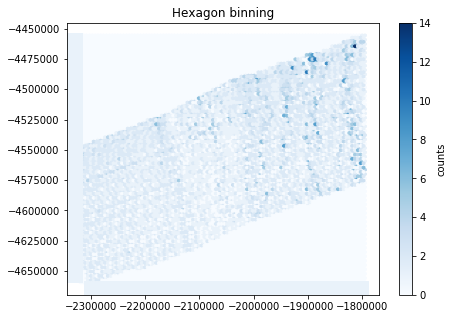

In [19]:
# hexbin demo: https://matplotlib.org/devdocs/gallery/statistics/hexbin_demo.html

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(7, 5))
hb = ax.hexbin(inFile.X, inFile.Y, \
               gridsize=100, \
               cmap='Blues', \
               marginals='True'\
              )
#ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

plt.show()

-2317912 -4659541


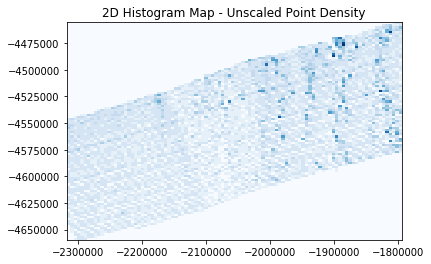

In [20]:
x_min = min(inFile.X)
x_max = max(inFile.X)
y_min = min(inFile.Y)
y_max = max(inFile.Y)
x_range = x_max - x_min
y_range = y_max - y_min

print(x_min,y_min)

plt.hist2d(inFile.X, inFile.Y, \
           bins=100, \
           cmap='Blues', \
           range=[[x_min, x_max], [y_min, y_max]]\
          )
plt.title("2D Histogram Map - Unscaled Point Density")
plt.show()